In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai',context='notebook',ticks=True, grid=False)

In [6]:
df_train = pd.read_csv("train1.txt",delimiter=';',names=['text','label'])
df_val = pd.read_csv("val.txt",delimiter=';',names=['text','label'])

In [7]:
df = pd.concat([df_train,df_val])
df.reset_index(inplace=True,drop=True)

In [8]:
df

text    label
0                                i didnt feel humiliated  sadness
1      i can go from feeling so hopeless to so damned...  sadness
2       im grabbing a minute to post i feel greedy wrong    anger
3      i am ever feeling nostalgic about the fireplac...     love
4                                   i am feeling grouchy    anger
...                                                  ...      ...
17995  im having ssa examination tomorrow in the morn...  sadness
17996  i constantly worry about their fight against n...      joy
17997  i feel its important to share this info for th...      joy
17998  i truly feel that if you are passionate enough...      joy
17999  i feel like i just wanna buy any cute make up ...      joy

[18000 rows x 2 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    18000 non-null  object
 1   label   18000 non-null  object
dtypes: object(2)
memory usage: 281.4+ KB


In [10]:
df.describe()

text  label
count                                               18000  18000
unique                                              17962      6
top     i am not amazing or great at photography but i...    joy
freq                                                    2   6066

In [11]:
df['text']

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
17995    im having ssa examination tomorrow in the morn...
17996    i constantly worry about their fight against n...
17997    i feel its important to share this info for th...
17998    i truly feel that if you are passionate enough...
17999    i feel like i just wanna buy any cute make up ...
Name: text, Length: 18000, dtype: object

<AxesSubplot:>

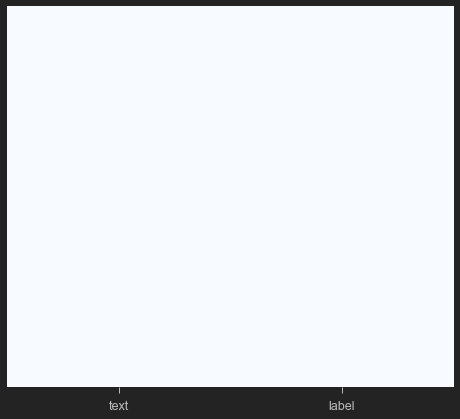

In [12]:
sns.heatmap(df.isnull(), yticklabels= False, cbar = False, cmap="Blues")

C:\Program Files\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

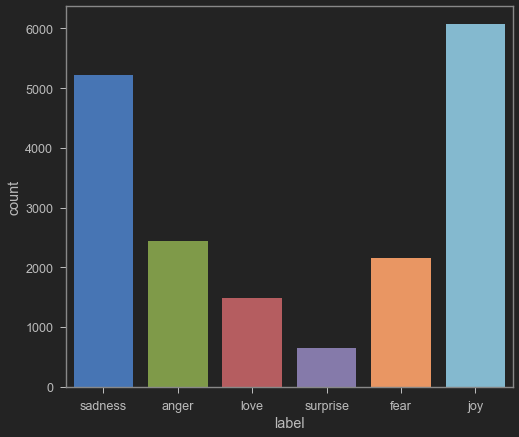

In [13]:
sns.countplot(df.label)

In [14]:
df.length=df['text'].apply(len)

<ipython-input-14-e9b60bac01f8>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.length=df['text'].apply(len)


<AxesSubplot:ylabel='Frequency'>

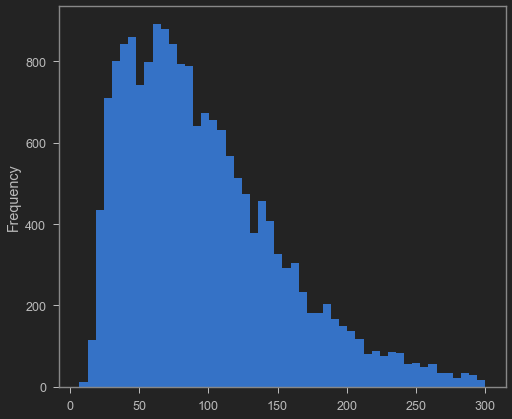

In [15]:
df.length.plot(bins=50, kind='hist')

In [16]:
df.describe()

text  label
count                                               18000  18000
unique                                              17962      6
top     i am not amazing or great at photography but i...    joy
freq                                                    2   6066

In [17]:
df[df.length == 7]['text'].iloc[0]

'one day'

In [18]:
def custom_encoder(df):
    df.replace(to_replace ="surprise", value =1, inplace=True)
    df.replace(to_replace ="love", value =1, inplace=True)
    df.replace(to_replace ="joy", value =1, inplace=True)
    df.replace(to_replace ="fear", value =0, inplace=True)
    df.replace(to_replace ="anger", value =0, inplace=True)
    df.replace(to_replace ="sadness", value =0, inplace=True)


In [19]:
custom_encoder(df['label'])

C:\Program Files\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

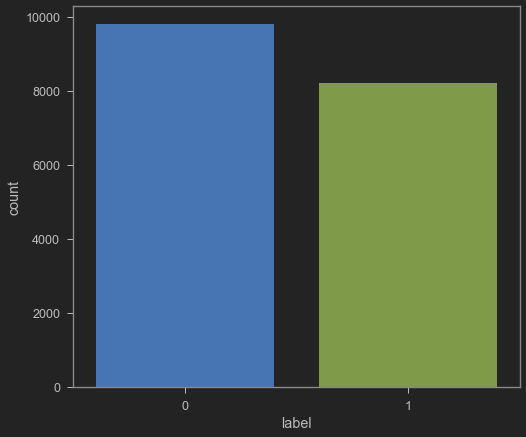

In [20]:
sns.countplot(df.label)

In [21]:
positive = df[df.label==1]

In [22]:
positive

text  label
3      i am ever feeling nostalgic about the fireplac...      1
6      ive been taking or milligrams or times recomme...      1
8      i have been with petronas for years i feel tha...      1
9                                    i feel romantic too      1
11     i do feel that running is a divine experience ...      1
...                                                  ...    ...
17992  i feel i should make is how surprised but ente...      1
17996  i constantly worry about their fight against n...      1
17997  i feel its important to share this info for th...      1
17998  i truly feel that if you are passionate enough...      1
17999  i feel like i just wanna buy any cute make up ...      1

[8201 rows x 2 columns]

In [23]:
negative = df[df.label==0]

In [24]:
negative

text  label
0                                i didnt feel humiliated      0
1      i can go from feeling so hopeless to so damned...      0
2       im grabbing a minute to post i feel greedy wrong      0
4                                   i am feeling grouchy      0
5      ive been feeling a little burdened lately wasn...      0
...                                                  ...    ...
17990  i just feel too overwhelmed i can t see the fo...      0
17991  i cant help but feel sentimental about the fac...      0
17993                           i feel so tortured by it      0
17994  i feel a bit rude leaving you hanging there fr...      0
17995  im having ssa examination tomorrow in the morn...      0

[9799 rows x 2 columns]

In [25]:
#Data Pre-Processing:-

In [26]:
sentence = df['text'].tolist()

In [27]:
sentence

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy',
 'ive been feeling a little burdened lately wasnt sure why that was',
 'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny',
 'i feel as confused about life as a teenager or as jaded as a year old man',
 'i have been with petronas for years i feel that petronas has performed well and made a huge profit',
 'i feel romantic too',
 'i feel like i have to make the suffering i m seeing mean something',
 'i do feel that running is a divine experience and that i can expect to have some type of spiritual encounter',
 'i think it s the easiest time of year to feel dissatisfied',
 'i feel low energy i m just thirst

In [28]:
len(sentence)

18000

In [29]:
sentence_as_one_string = " ".join(sentence)

In [30]:
sentence_as_one_string

'i didnt feel humiliated i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake im grabbing a minute to post i feel greedy wrong i am ever feeling nostalgic about the fireplace i will know that it is still on the property i am feeling grouchy ive been feeling a little burdened lately wasnt sure why that was ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny i feel as confused about life as a teenager or as jaded as a year old man i have been with petronas for years i feel that petronas has performed well and made a huge profit i feel romantic too i feel like i have to make the suffering i m seeing mean something i do feel that running is a divine experience and that i can expect to have some type of spiritual encounter i think it s the easiest time of year to feel dissatisfied i feel low energy i m just thirsty i have immense sympathy with the general point but 

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    18000 non-null  object
 1   label   18000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 281.4+ KB


In [32]:
from wordcloud import WordCloud

In [33]:
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(sentence_as_one_string)

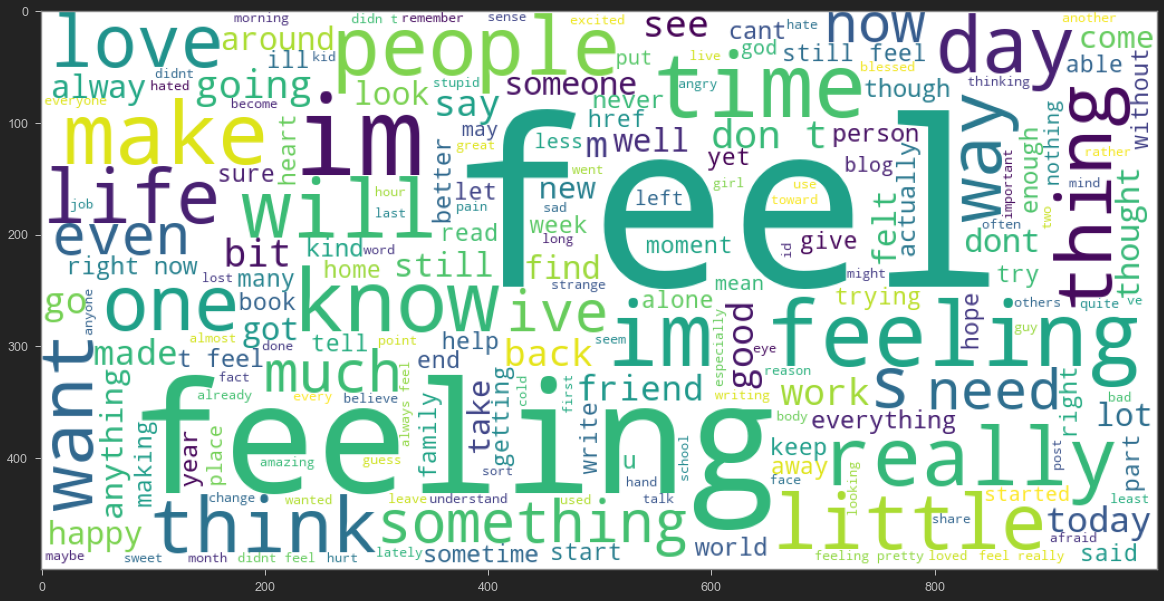

In [34]:
#Visual representation of all the words in dataset
#depict text in such a way that, the more frequent words appear enlarged as compared to less frequent words
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)

In [35]:
#visual representation of negative dataframe:-
negative_list=negative['text'].tolist()
negative_as_one_string = "  ".join(negative_list)
negativewordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(negative_as_one_string)

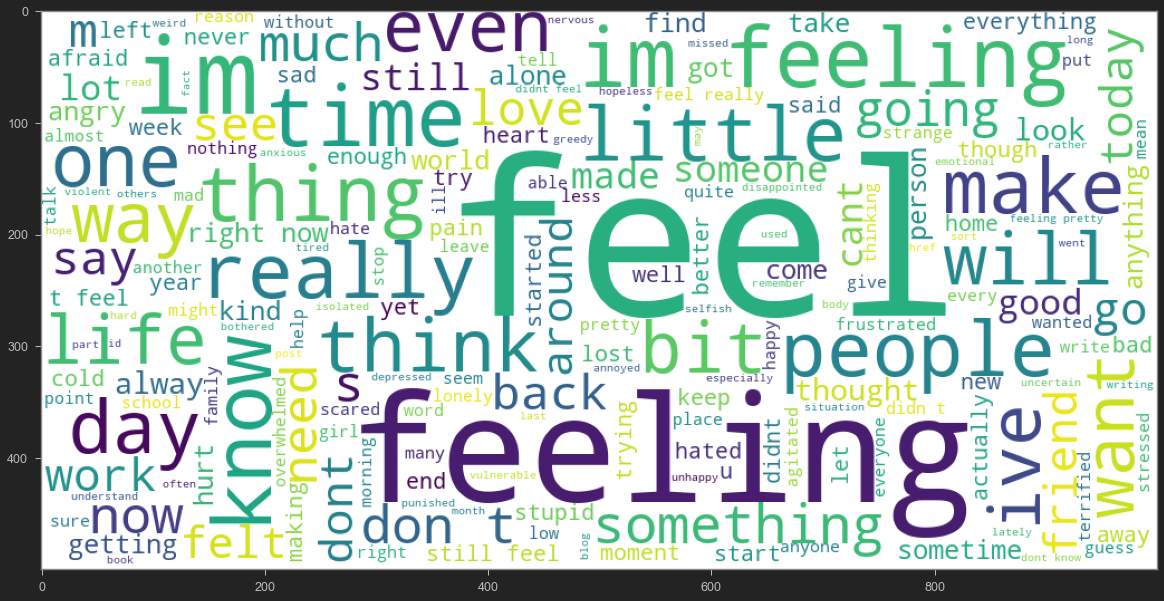

In [36]:
plt.figure(figsize=(20,20))
plt.imshow(negativewordcloud)

In [37]:
#Remove punctuations and stopwords:-

In [38]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [39]:
#natural language tool kit
import nltk

In [40]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DEVIKA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [42]:
#CountVectorizer – transform text to vectors
from sklearn.feature_extraction.text import CountVectorizer

In [43]:
#pipline to remove punctuations and stopwords and do countVecrorizer

In [44]:
def msgclean(msg):
    test_punc_remove = [char for char in msg if char not in string.punctuation]
    test_punc_remove_join = "".join(test_punc_remove)
    test_punc_remove_join_clean = [word for word in test_punc_remove_join.split() if word.lower() not in stopwords.words('english')]
    return test_punc_remove_join_clean

In [45]:
df_clean = df['text'].apply(msgclean)

In [46]:
#clean text
print(df_clean.tolist())

[['didnt', 'feel', 'humiliated'], ['go', 'feeling', 'hopeless', 'damned', 'hopeful', 'around', 'someone', 'cares', 'awake'], ['im', 'grabbing', 'minute', 'post', 'feel', 'greedy', 'wrong'], ['ever', 'feeling', 'nostalgic', 'fireplace', 'know', 'still', 'property'], ['feeling', 'grouchy'], ['ive', 'feeling', 'little', 'burdened', 'lately', 'wasnt', 'sure'], ['ive', 'taking', 'milligrams', 'times', 'recommended', 'amount', 'ive', 'fallen', 'asleep', 'lot', 'faster', 'also', 'feel', 'like', 'funny'], ['feel', 'confused', 'life', 'teenager', 'jaded', 'year', 'old', 'man'], ['petronas', 'years', 'feel', 'petronas', 'performed', 'well', 'made', 'huge', 'profit'], ['feel', 'romantic'], ['feel', 'like', 'make', 'suffering', 'seeing', 'mean', 'something'], ['feel', 'running', 'divine', 'experience', 'expect', 'type', 'spiritual', 'encounter'], ['think', 'easiest', 'time', 'year', 'feel', 'dissatisfied'], ['feel', 'low', 'energy', 'thirsty'], ['immense', 'sympathy', 'general', 'point', 'possible

In [47]:
#original text
print(df['text'].tolist())

['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy', 'ive been feeling a little burdened lately wasnt sure why that was', 'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny', 'i feel as confused about life as a teenager or as jaded as a year old man', 'i have been with petronas for years i feel that petronas has performed well and made a huge profit', 'i feel romantic too', 'i feel like i have to make the suffering i m seeing mean something', 'i do feel that running is a divine experience and that i can expect to have some type of spiritual encounter', 'i think it s the easiest time of year to feel dissatisfied', 'i feel low energy i m just thirsty', 'i have i

In [48]:
vectorizer = CountVectorizer(analyzer = msgclean)
tweet_countvectorizer = CountVectorizer(analyzer = msgclean , dtype ='uint8').fit_transform(df['text']).toarray()

In [49]:
tweet_countvectorizer.shape

(18000, 16047)

In [81]:
print(tweet_countvectorizer)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [50]:
X = tweet_countvectorizer
Y = df['label']

In [51]:
X.shape

(18000, 16047)

In [52]:
Y.shape

(18000,)

In [53]:
#splitting the data into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size = 0.2)


In [54]:
#Model Development and prediction--- Logistic Regression-----
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,Y_train)

y_pred=logreg.predict(X_test)

C:\Program Files\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
#Model Evaluation using Confusion Matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
cnf_matrix

array([[1916,   69],
       [  61, 1554]], dtype=int64)

Text(0.5, 447.52, 'Predicted label')

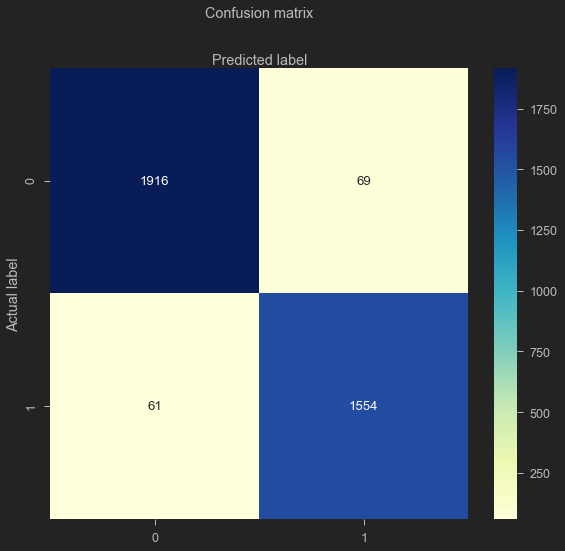

In [56]:
#Visualizing Confusion Matrix using Heatmap
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [57]:
#Confusion Matrix Evaluation Metrics
print("Accuracy:",(metrics.accuracy_score(Y_test, y_pred))*100.0,"%")
print("Precision:",(metrics.precision_score(Y_test, y_pred))*100.0,"%")
print("Recall:",(metrics.recall_score(Y_test, y_pred))*100.0,"%")

Accuracy: 96.38888888888889 %
Precision: 95.74861367837339 %
Recall: 96.22291021671828 %


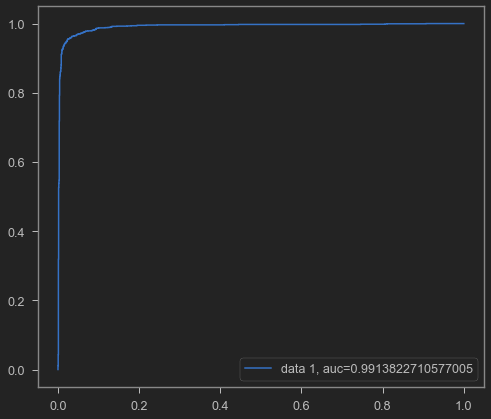

In [58]:
#ROC Curve
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [59]:
from numpy import loadtxt

In [60]:
from xgboost import XGBClassifier

In [61]:
from sklearn.metrics import accuracy_score

In [62]:
Xx=df.iloc[:,0:8]
Yy=df.iloc[:,1]
Xx_train,Xx_test,Yy_train,Yy_test= train_test_split(X,Y,test_size = 0.2,random_state=42)

In [63]:
# fit model on training data
model =XGBClassifier()
eval_set = [(Xx_test, Yy_test)]
model.fit(Xx_train,Yy_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)

C:\Users\DEVIKA\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-logloss:0.67970
[1]	validation_0-logloss:0.66996
[2]	validation_0-logloss:0.66281
[3]	validation_0-logloss:0.65741
[4]	validation_0-logloss:0.65293
[5]	validation_0-logloss:0.64557
[6]	validation_0-logloss:0.63939
[7]	validation_0-logloss:0.63373
[8]	validation_0-logloss:0.62832
[9]	validation_0-logloss:0.62250
[10]	validation_0-logloss:0.61739
[11]	validation_0-logloss:0.61143
[12]	validation_0-logloss:0.60650
[13]	validation_0-logloss:0.60093
[14]	validation_0-logloss:0.59619
[15]	validation_0-logloss:0.59220
[16]	validation_0-logloss:0.58747
[17]	validation_0-logloss:0.58288
[18]	validation_0-logloss:0.57771
[19]	validation_0-logloss:0.57267
[20]	validation_0-logloss:0.56822
[21]	validation_0-logloss:0.56355
[22]	validation_0-logloss:0.55893
[23]	validation_0-logloss:0.55540
[24]	validation_0-logloss:0.55186
[25]	validation_0-logloss:0.54918
[26]	validation_0-logloss:0.54471
[27]	validation_0-logloss:0.54113
[28]	validation_0-logloss:0.53717
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [64]:
#make predictions for test data
predictions = model.predict(Xx_test)

In [65]:
from xgboost import plot_importance

In [66]:
#evaluate predictions
accuracy = accuracy_score(Yy_test,predictions)
print("Accuracy: %.2f%%" % (accuracy*100.0))

Accuracy: 93.53%


In [67]:
Precision= metrics.precision_score(Yy_test, predictions)
print("Precision: %.2f%%" % (Precision*100.0))

Precision: 95.39%


In [68]:
from sklearn.model_selection import train_test_split
Xn_train,Xn_test,Yn_train,Yn_test= train_test_split(X,Y,test_size = 0.2)

In [69]:
from sklearn.naive_bayes import MultinomialNB

In [70]:
NB_classifier = MultinomialNB()
NB_classifier.fit(Xn_train,Yn_train)

MultinomialNB()

In [71]:
from sklearn.metrics import classification_report,confusion_matrix

<AxesSubplot:>

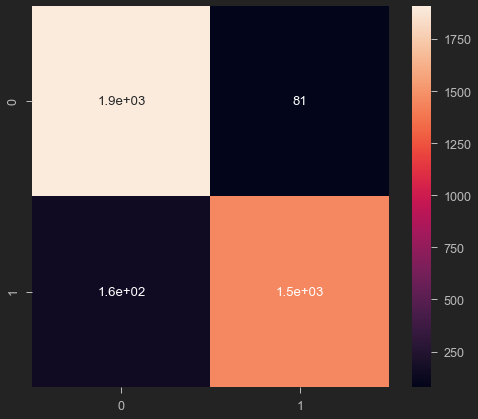

In [72]:
Yn_predict_test=NB_classifier.predict(Xn_test)
cm = confusion_matrix(Yn_test,Yn_predict_test)
sns.heatmap(cm,annot=True)

In [73]:
#NIAVE-BAYES--FINAL RESULT--
print(classification_report(Yn_test,Yn_predict_test))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1988
           1       0.95      0.90      0.93      1612

    accuracy                           0.93      3600
   macro avg       0.94      0.93      0.93      3600
weighted avg       0.93      0.93      0.93      3600



In [74]:
#XGBOOST--FINAL RESULT--
print(classification_report(Yy_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1969
           1       0.95      0.90      0.93      1631

    accuracy                           0.94      3600
   macro avg       0.94      0.93      0.93      3600
weighted avg       0.94      0.94      0.94      3600



In [75]:
#lOGISTIC REGRESSION--FINAL RESULT--
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1985
           1       0.96      0.96      0.96      1615

    accuracy                           0.96      3600
   macro avg       0.96      0.96      0.96      3600
weighted avg       0.96      0.96      0.96      3600

